In [16]:
import requests
from bs4 import BeautifulSoup as bs
html = requests.get("https://news.naver.com/").text
soup = bs(html, 'html.parser')
body = soup.select_one("body")
text = body.get_text().strip().replace("\n","")
stopwords = ['본문','바로가기','NAVER','검색','이슈','닫기','구독'] # 불용어

text

'본문 바로가기NAVER뉴스엔터스포츠날씨프리미엄대선검색언론사별정치경제사회생활/문화IT/과학세계랭킹신문보기오피니언TV팩트체크알고리즘 안내정정보도 모음콘텐츠6.5(목)전체 언론사뉴스스탠드라이브러리언론사편집기자                                            연재                                                            구독설정                                속보美, 쿠바·라오스 등 7개국 국민 입국 부분 제한뉴스1내용작성전김민석 “제2 IMF같은 상황…민생·통합 새기겠다”서울신문내용작성전김민석 “제2 IMF같은 상황…민생·통합 새기겠다”문화일보"트럼프, 이란 등 12개국 대상 입국 금지 포고문 서명" CNN데일리안내용작성전김민석 총리 지명자 “제2의 IMF 위기···첫째 둘째 셋째도 민생”경향신문경찰, 李대통령 근접 경호 종료..경호처로 인계kbc광주방송“트럼프, 이란 등 12개국 입국 금지 포고문에 서명”국민일보내용작성전코스피 이틀 연속 상승…2,790선 상회연합뉴스TV김민석 국무총리 지명자 “국민 집단 지성 하늘 같이 받들겠다”세계일보김민석 총리 후보자 "제2 IMF같은 상황…민생·통합 새기겠다"중앙일보내용작성전李대통령 경호 경찰전담경호대 철수…경호처로 인계대전일보\'총리 후보\' 김민석 "제2 IMF같은 상황…민생·통합 새길 것"머니투데이내용작성전김민석 "제2 IMF같은 상황…극복하기 위해 첫째도 민생"파이낸셜뉴스내용작성전김민석 총리 후보자 "제2 IMF 같은 어려운 상황…민생·통합 매일 새길 것"뉴시스내용작성전김민석 "제2 IMF같은 상황…민생·통합 새기겠다"MBN내용작성전이 대통령 경호 경찰전담경호대 4일 밤 철수…경호처로 인계강원도민일보김민석 총리 후보자 “제2의 IMF 같은 상황…민생과 통합 새길 것”KBS내용작성전김민석 "李정부, 국민의 집단지성 하늘같이 받들 것"서울경제내용작성전김민석 총리후보자 "이재명 정부, 국민 집단지성 하늘같이 받들 것"머니

In [2]:
# konlpy : 한국어 형태소 분석기
!pip install konlpy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### konlpy.tag.Okt
- morphs : 테스트에서 형태소를 분리 반환
- pos : 형태소를 분리할때 

> 형태소 : 의미를 가진 최소 단위

In [3]:
from konlpy.tag import Okt
okt = Okt()
okt

In [4]:
okt.morphs("나는 학원에 갑니다.")

['나', '는', '학원', '에', '갑니다', '.']

In [5]:
okt.pos("나는 멋진 학원에 갑니다.")

[('나', 'Noun'),
 ('는', 'Josa'),
 ('멋진', 'Adjective'),
 ('학원', 'Noun'),
 ('에', 'Josa'),
 ('갑니다', 'Verb'),
 ('.', 'Punctuation')]

In [6]:
# 품사별로 토큰화
words = []
for word, pos in okt.pos(text):
    if word not in stopwords and pos in ['Noun','Verb','Adjective']:
        words.append(word)
words[:50]

['뉴스',
 '엔터스',
 '포츠',
 '날씨',
 '프리미엄',
 '대선',
 '언론사',
 '정치',
 '사회생활',
 '문화',
 '과학',
 '세계',
 '랭킹',
 '신문',
 '보기오',
 '피니언',
 '팩트',
 '체크',
 '알고리즘',
 '안내',
 '정정',
 '보도',
 '모음',
 '콘텐츠',
 '목',
 '전체',
 '언론사',
 '뉴스스탠드',
 '라이브러리',
 '언론사',
 '편집',
 '기자',
 '연재',
 '설정',
 '속보',
 '쿠바',
 '라오스',
 '등',
 '개국',
 '국민',
 '입국',
 '부분',
 '제한',
 '뉴스',
 '내용',
 '김민석',
 '제',
 '같은',
 '상황',
 '민생']

In [7]:
!pip install Counter

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\admin\AppData\Local\Temp\pip-build-env-epcyserp\

In [8]:
from collections import Counter

In [9]:
# most_common(숫자) : 가장 카운트가 많은 숫자 갯수 만큼
# stat = Counter(words)
stat = Counter(words).most_common(50)
stat

[('대통령', 98),
 ('이재명', 90),
 ('정부', 57),
 ('김민석', 33),
 ('경호', 33),
 ('신문', 32),
 ('국민', 31),
 ('대선', 29),
 ('속보', 28),
 ('보기', 28),
 ('해보세요', 28),
 ('것', 26),
 ('관심', 26),
 ('통합', 24),
 ('트럼프', 24),
 ('경찰', 24),
 ('민생', 23),
 ('일보', 22),
 ('제', 19),
 ('첫', 19),
 ('새', 19),
 ('같은', 18),
 ('상황', 18),
 ('경제', 18),
 ('경호처', 17),
 ('힘', 17),
 ('총리', 16),
 ('전담', 16),
 ('대', 16),
 ('취임', 15),
 ('모두', 15),
 ('이', 15),
 ('인계', 14),
 ('철수', 14),
 ('관세', 14),
 ('내용', 13),
 ('단독', 13),
 ('시대', 13),
 ('기자', 12),
 ('위기', 12),
 ('후보자', 12),
 ('원전', 12),
 ('당선', 12),
 ('출범', 12),
 ('실용', 12),
 ('명', 11),
 ('민주당', 11),
 ('법', 11),
 ('하는', 11),
 ('시장', 11)]

In [10]:
# 워드 클라우드
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from wordcloud import WordCloud

In [12]:
wc = WordCloud(font_path='C:/Users/admin/Downloads/Nanum_Gothic/NanumGothic-ExtraBold.ttf', background_color='white', max_font_size=200, width=500, height=300)
cloud = wc.generate_from_frequencies(dict(stat))

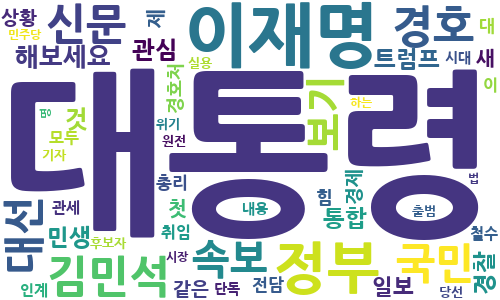

In [13]:
cloud.to_image()

In [14]:
# 워드 클라우드 이미지를 파일로 저장
from time import strftime
cloud.to_file(f"{strftime('%Y%m%d%H')}_news.jpg")